<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    934 non-null    object
 1   rating  934 non-null    int64 
 2   review  934 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.0+ KB
None
        date  rating                                             review
0  25.08.31.       5  유통기한도 굉장히 기네요\n\n일단 저는 뽀득뽀득 클렌저를 ㅂㄹ 안 좋아합니다\n흔...
1  25.08.30.       5  자극없이 깨끗하게 세안되어 만족합니다.\n선크림도 깔끔없이 지워지고 세안 후 수분이...
2  25.09.01.       5         거품도 잘 나고 트러블 피부에도 좋은 성분으로 만들어진 클렌징폼이라 좋아요💚
3  25.08.24.       5  아이들 여드름때문에 주문했어요\n아비브부활초라인 광팬이라 더 믿음이 갔구요\n제가 ...
4  25.09.01.       5                                   원래 사용하고 있던거고 좋아요


C:\Users\user\AppData\Local\Temp\ipykernel_12160\3085008139.py:27: UserWarning: Glyph 128512 (\N{GRINNING FACE}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\user\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128512 (\N{GRINNING FACE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128512 (\N{GRINNING FACE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


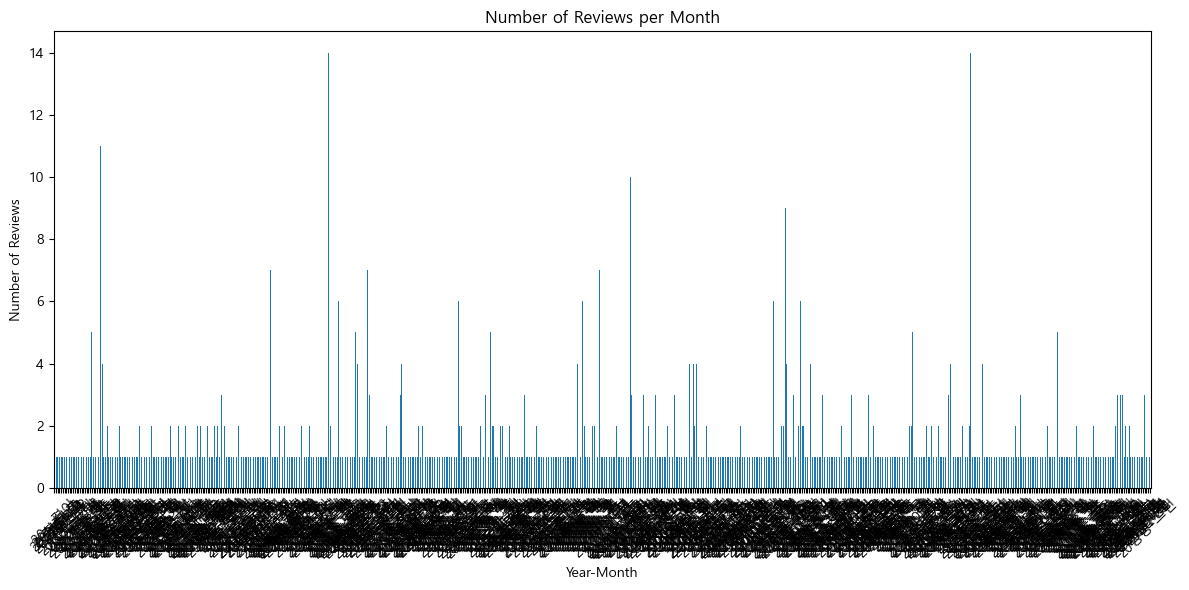

In [6]:
import pandas as pd
df_raw = pd.read_excel('review_crawling_raw.xlsx')

import matplotlib.pyplot as plt

# Display basic info
print(df_raw.info())
print(df_raw.head())

# If the file contains a 'review' column similar to df, let's analyze review dates
if 'review' in df_raw.columns:
    # Extract year and month if the format is similar (YY.MM.DD.)
    df_raw['year'] = df_raw['review'].str.slice(0, 2)
    df_raw['month'] = df_raw['review'].str.slice(3, 5)
    df_raw['year_month'] = '20' + df_raw['year'] + '-' + df_raw['month']

    # Count reviews per month
    review_counts = df_raw['year_month'].value_counts().sort_index()

    # Visualization
    plt.figure(figsize=(12,6))
    review_counts.plot(kind='bar')
    plt.title('Number of Reviews per Month')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'review' column found in the Excel file.")

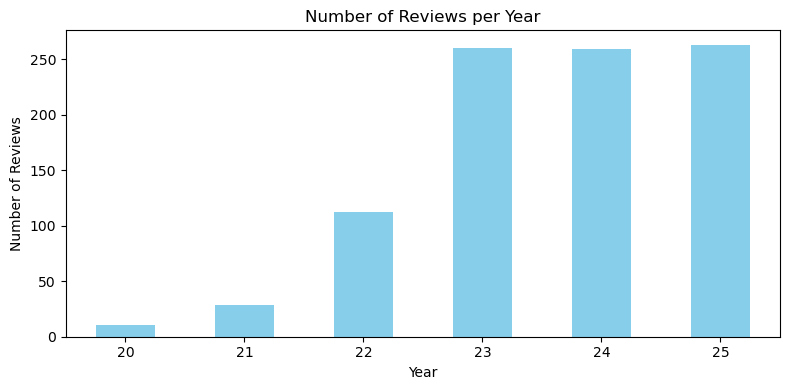

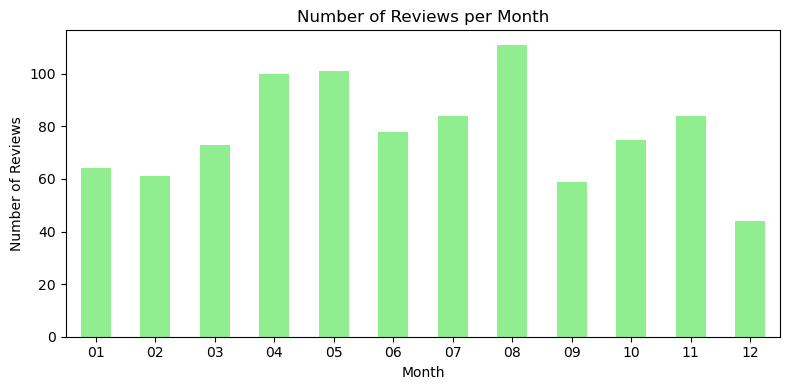

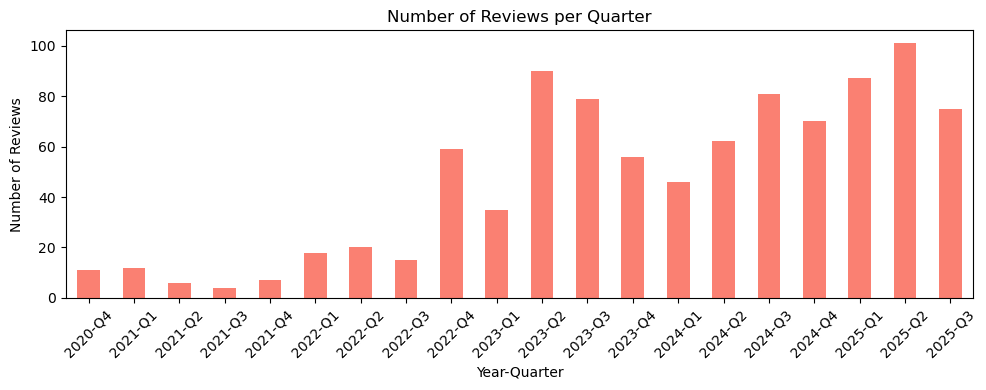

In [3]:
# 연도, 월, 분기별 리뷰 개수 시각화

# 연도별 리뷰 개수
df_raw['year_only'] = df_raw['date'].str.slice(0, 2)
year_counts = df_raw['year_only'].value_counts().sort_index()

plt.figure(figsize=(8,4))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 월별 리뷰 개수
df_raw['month_only'] = df_raw['date'].str.slice(3, 5)
month_counts = df_raw['month_only'].value_counts().sort_index()

plt.figure(figsize=(8,4))
month_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 분기별 리뷰 개수
df_raw['quarter'] = df_raw['month_only'].astype(int).apply(lambda x: (x-1)//3 + 1)
df_raw['year_quarter'] = '20' + df_raw['year_only'] + '-Q' + df_raw['quarter'].astype(str)
quarter_counts = df_raw['year_quarter'].value_counts().sort_index()

plt.figure(figsize=(10,4))
quarter_counts.plot(kind='bar', color='salmon')
plt.title('Number of Reviews per Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

리뷰 데이터로 추가로 분석할 수 있는 예시입니다:

1. **평점(rating) 분포 분석**  
    - 각 평점별 리뷰 개수, 평균 평점, 연도/월별 평점 변화 등

2. **리뷰 길이 분석**  
    - 리뷰별 글자 수/단어 수 분포, 연도별/월별 평균 리뷰 길이

3. **자주 등장하는 단어/키워드 분석**  
    - 워드클라우드, 상위 빈도 단어, 긍정/부정 키워드 등

4. **리뷰의 감성 분석**  
    - 긍정/부정 리뷰 비율, 평점과 감성의 상관관계

5. **리뷰 작성자별 분석** (작성자 정보가 있다면)
    - 다작 리뷰어, 리뷰어별 평점 경향 등

6. **특정 기간/이벤트 전후 변화**  
    - 이벤트/프로모션 전후 리뷰 개수, 평점 변화 등

원하는 분석 방향을 말씀해주시면, 코드 예시를 제공해드릴 수 있습니다.

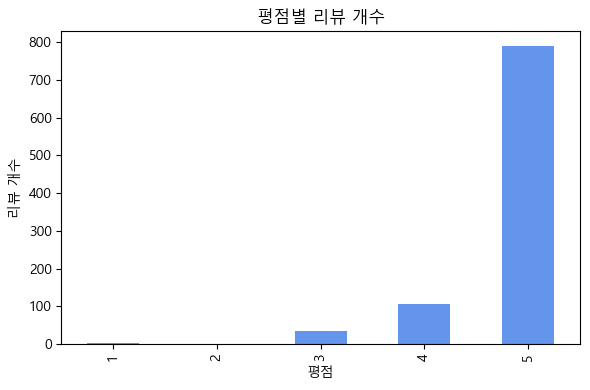

리뷰 평균 평점: 4.80


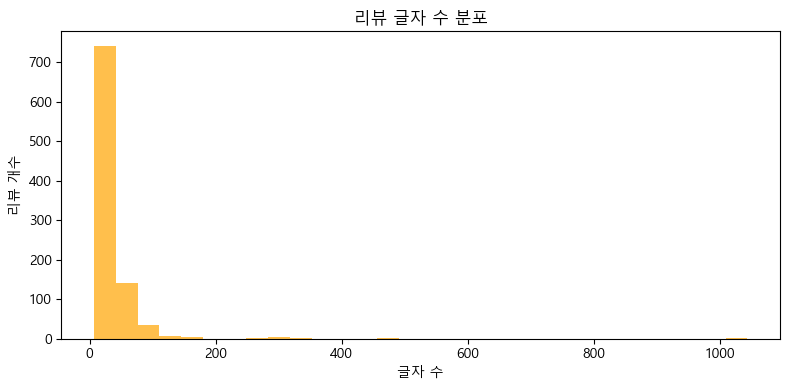

KeyError: 'year_only'

In [7]:
# 한글 폰트 설정 (matplotlib)
plt.rc('font', family='Malgun Gothic')  # 이미 font_path가 있으니, 필요시 아래처럼 사용 가능
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.sans-serif'] = ['Malgun Gothic']
# plt.rcParams['axes.unicode_minus'] = False

# 1. 평점 분포 분석
plt.figure(figsize=(6,4))
df_raw['rating'].value_counts().sort_index().plot(kind='bar', color='cornflowerblue')
plt.title('평점별 리뷰 개수')
plt.xlabel('평점')
plt.ylabel('리뷰 개수')
plt.tight_layout()
plt.show()

print(f"리뷰 평균 평점: {df_raw['rating'].mean():.2f}")

# 2. 리뷰 길이 분석
df_raw['review_length'] = df_raw['review'].str.len()
plt.figure(figsize=(8,4))
df_raw['review_length'].plot(kind='hist', bins=30, color='orange', alpha=0.7)
plt.title('리뷰 글자 수 분포')
plt.xlabel('글자 수')
plt.ylabel('리뷰 개수')
plt.tight_layout()
plt.show()

# 연도별 평균 리뷰 길이
yearly_length = df_raw.groupby('year_only')['review_length'].mean()
plt.figure(figsize=(8,4))
yearly_length.plot(kind='bar', color='teal')
plt.title('연도별 평균 리뷰 길이')
plt.xlabel('연도')
plt.ylabel('평균 글자 수')
plt.tight_layout()
plt.show()

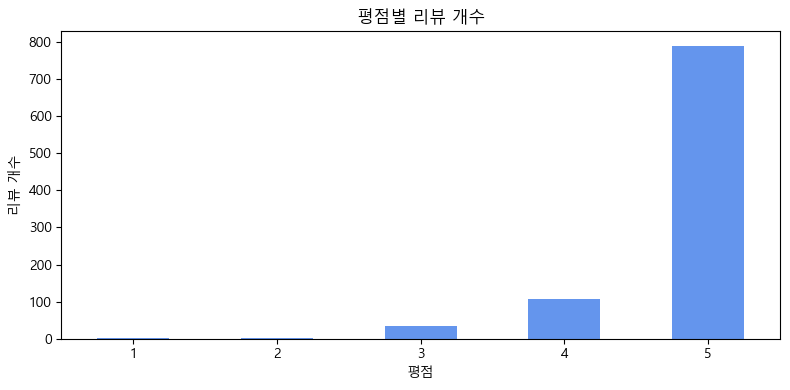

C:\Users\user\AppData\Local\Temp\ipykernel_12160\3029711549.py:10: UserWarning: Glyph 128512 (\N{GRINNING FACE}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\user\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128512 (\N{GRINNING FACE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128512 (\N{GRINNING FACE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


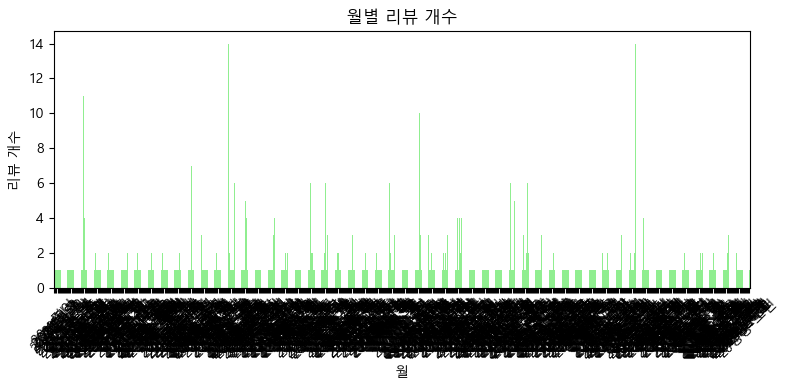

In [8]:
# 데이터 분석 결과를 시각화하는 함수 예시

def plot_series(series, title, xlabel, ylabel, kind='bar', color=None, figsize=(8,4), rotation=0):
    plt.figure(figsize=figsize)
    series.plot(kind=kind, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

# 예시: 평점 분포 시각화
plot_series(rating_counts, '평점별 리뷰 개수', '평점', '리뷰 개수', kind='bar', color='cornflowerblue')

# 예시: 월별 리뷰 개수 시각화
plot_series(review_counts, '월별 리뷰 개수', '월', '리뷰 개수', kind='bar', color='lightgreen', rotation=45)

상위 30개 단어: [('사용', 230), ('피부', 147), ('제품', 122), ('구매', 118), ('자극', 109), ('아비', 84), ('세안', 81), ('배송', 74), ('거품', 66), ('정력', 65), ('트러블', 58), ('여드름', 53), ('어성초', 53), ('느낌', 41), ('폼클렌징', 35), ('주문', 31), ('아주', 31), ('아침', 30), ('무난', 29), ('클렌징', 25), ('아들', 24), ('구입', 24), ('계속', 23), ('보고', 23), ('항상', 23), ('처음', 22), ('성분', 21), ('추천', 21), ('아이', 19), ('쓰기', 19)]


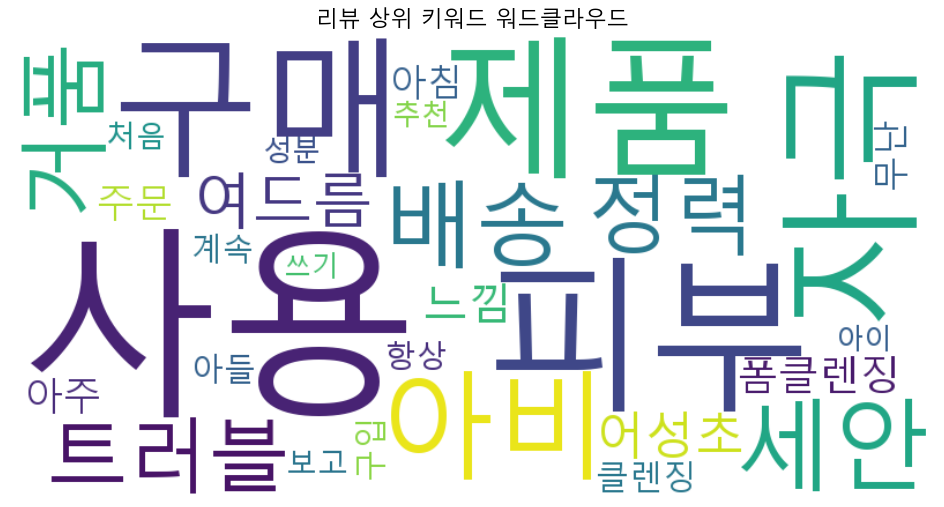

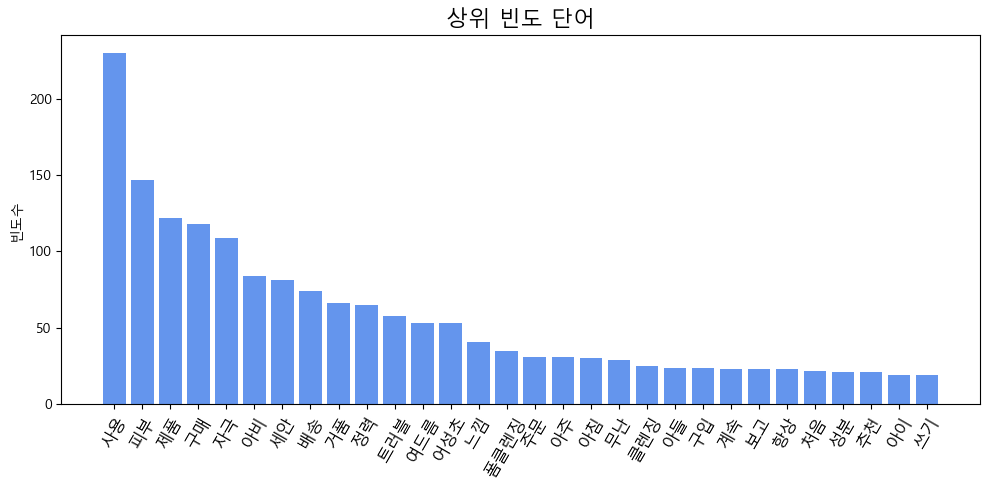

In [9]:
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt

import matplotlib.pyplot as plt

# 한글 형태소 분석기 설치 필요: konlpy (예: Okt)
okt = Okt()

# 리뷰 텍스트 합치기
text = ' '.join(df_raw['review'].dropna())

# 명사 추출 (한글 워드클라우드에 적합)
nouns = okt.nouns(text)
nouns = [noun for noun in nouns if len(noun) > 1]  # 한 글자 제외

# 상위 빈도 단어 추출
counter = Counter(nouns)
top_words = counter.most_common(30)
print("상위 30개 단어:", top_words)

# 워드클라우드 생성
wc = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
)
wc.generate_from_frequencies(dict(top_words))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('리뷰 상위 키워드 워드클라우드', fontsize=16)
plt.show()

# 상위 빈도 단어 막대그래프
words, counts = zip(*top_words)
plt.figure(figsize=(10,5))
plt.bar(words, counts, color='cornflowerblue')
plt.xticks(rotation=60, fontsize=12)
plt.title('상위 빈도 단어', fontsize=16)
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

In [10]:
# 의미 없는 단어(불용어)와 축약/오타 단어를 정제하여 상위 키워드 재가공

# 불용어(제외할 단어) 리스트
stopwords = {'아주', '보고', '쓰기', '항상', '계속', '처음', '무난', '아침', '주문', '구입'}

# 축약/오타 단어 매핑 (예시)
replace_map = {
    '아비': '아비브',
    '정력': '세정력'
}

# 단어 정제 함수
def refine_top_words(top_words, stopwords, replace_map):
    refined = []
    for word, count in top_words:
        # 불용어 제거
        if word in stopwords:
            continue
        # 축약/오타 교정
        word = replace_map.get(word, word)
        refined.append((word, count))
    return refined

refined_top_words = refine_top_words(top_words, stopwords, replace_map)
print("정제된 상위 키워드:", refined_top_words)

정제된 상위 키워드: [('사용', 230), ('피부', 147), ('제품', 122), ('구매', 118), ('자극', 109), ('아비브', 84), ('세안', 81), ('배송', 74), ('거품', 66), ('세정력', 65), ('트러블', 58), ('여드름', 53), ('어성초', 53), ('느낌', 41), ('폼클렌징', 35), ('클렌징', 25), ('아들', 24), ('성분', 21), ('추천', 21), ('아이', 19)]


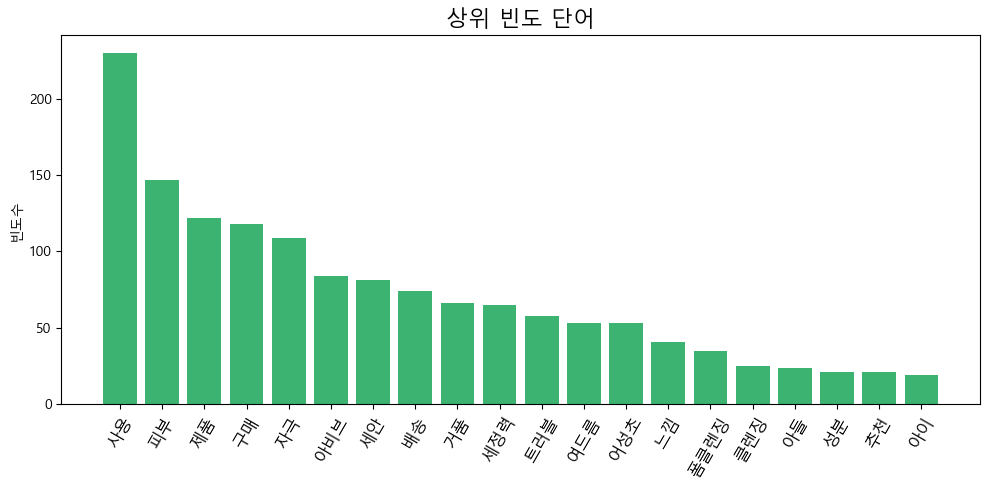

In [13]:
# refined_top_words를 막대그래프로 시각화

refined_words, refined_counts = zip(*refined_top_words)

plt.figure(figsize=(10,5))
plt.bar(refined_words, refined_counts, color='mediumseagreen')
plt.xticks(rotation=60, fontsize=12)
plt.title('상위 빈도 단어', fontsize=16)
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

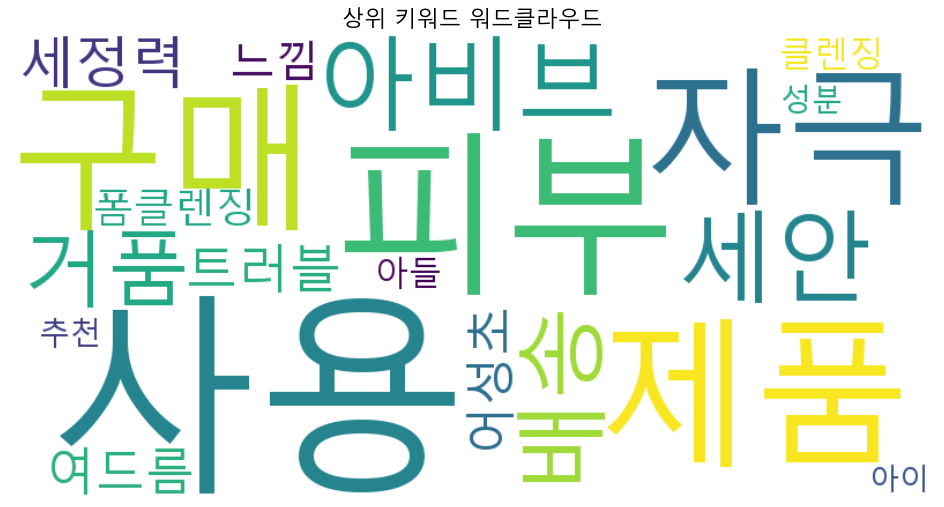

In [14]:
# top_words에서 불용어 제거 및 축약/오타 교정
def refine_top_words(top_words, stopwords, replace_map):
    refined = []
    for word, count in top_words:
        if word in stopwords:
            continue
        word = replace_map.get(word, word)
        refined.append((word, count))
    return refined

refined_top_words = refine_top_words(top_words, stopwords, replace_map)

# 워드클라우드 재생성
wc_refined = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
)
wc_refined.generate_from_frequencies(dict(refined_top_words))

plt.figure(figsize=(12,6))
plt.imshow(wc_refined, interpolation='bilinear')
plt.axis('off')
plt.title('상위 키워드 워드클라우드', fontsize=16)
plt.show()

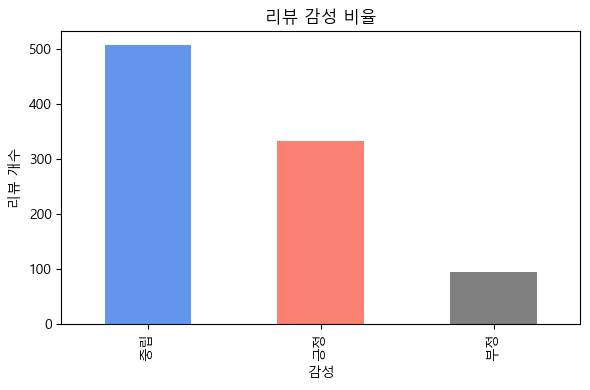

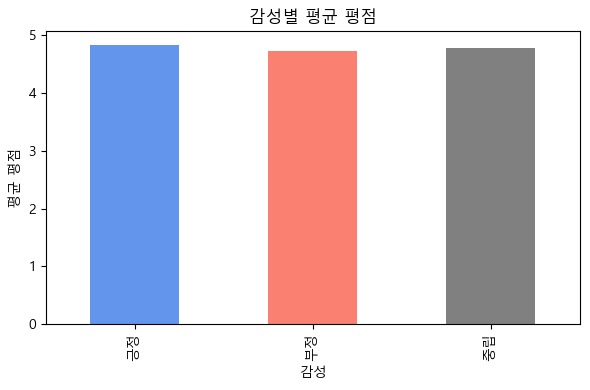

sentiment
중립    507
긍정    333
부정     94
Name: count, dtype: int64
sentiment
긍정    4.828829
부정    4.723404
중립    4.788955
Name: rating, dtype: float64


In [15]:
from konlpy.tag import Okt
from collections import Counter

# 간단 감성 사전 (예시, 실제 분석엔 더 많은 단어 필요)
positive_words = {'좋다', '만족', '추천', '최고', '좋아요', '훌륭', '감사', '잘', '편하다', '효과', '개운', '깨끗'}
negative_words = {'별로', '아쉽', '실망', '나쁘다', '불만', '문제', '트러블', '자극', '안좋', '아프', '따갑', '불편'}

okt = Okt()

def get_sentiment(text):
    if not isinstance(text, str):
        return '중립'
    tokens = okt.morphs(text)
    pos = sum(token in positive_words for token in tokens)
    neg = sum(token in negative_words for token in tokens)
    if pos > neg:
        return '긍정'
    elif neg > pos:
        return '부정'
    else:
        return '중립'

# 리뷰 감성 컬럼 추가
df_raw['sentiment'] = df_raw['review'].apply(get_sentiment)

# 감성 비율 시각화
sentiment_counts = df_raw['sentiment'].value_counts()
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['cornflowerblue', 'salmon', 'gray'])
plt.title('리뷰 감성 비율')
plt.xlabel('감성')
plt.ylabel('리뷰 개수')
plt.tight_layout()
plt.show()

# 평점과 감성의 상관관계 (평균 평점)
sentiment_rating = df_raw.groupby('sentiment')['rating'].mean()
plt.figure(figsize=(6,4))
sentiment_rating.plot(kind='bar', color=['cornflowerblue', 'salmon', 'gray'])
plt.title('감성별 평균 평점')
plt.xlabel('감성')
plt.ylabel('평균 평점')
plt.tight_layout()
plt.show()

print(sentiment_counts)
print(sentiment_rating)

In [16]:
# 리뷰 작성자별 분석: 다작 리뷰어, 리뷰어별 평점 경향

if 'author' in df_raw.columns:
    # 다작 리뷰어 TOP 20
    author_counts = df_raw['author'].value_counts().head(20)
    plt.figure(figsize=(10,5))
    author_counts.plot(kind='bar', color='slateblue')
    plt.title('다작 리뷰어 TOP 20')
    plt.xlabel('작성자')
    plt.ylabel('리뷰 개수')
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()

    # 리뷰어별 평균 평점 TOP 20 (리뷰 5개 이상 작성자만)
    author_rating = df_raw.groupby('author')['rating'].agg(['mean', 'count'])
    prolific_authors = author_rating[author_rating['count'] >= 5].sort_values('mean', ascending=False).head(20)
    plt.figure(figsize=(10,5))
    prolific_authors['mean'].plot(kind='bar', color='mediumseagreen')
    plt.title('리뷰어별 평균 평점 (리뷰 5개 이상, TOP 20)')
    plt.xlabel('작성자')
    plt.ylabel('평균 평점')
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()

    print("다작 리뷰어 TOP 20:\n", author_counts)
    print("리뷰어별 평균 평점 (리뷰 5개 이상, TOP 20):\n", prolific_authors)
else:
    print("작성자(author) 정보가 데이터에 없습니다.")

작성자(author) 정보가 데이터에 없습니다.


In [1]:
# 평균 평점 데이터 추출 및 분석/시각화

# 전체 평균 평점
overall_mean_rating = df_raw['rating'].mean()
print(f"전체 평균 평점: {overall_mean_rating:.2f}")

# 연도별 평균 평점
yearly_mean_rating = df_raw.groupby('year_only')['rating'].mean()
plt.figure(figsize=(8,4))
yearly_mean_rating.plot(kind='bar', color='cornflowerblue')
plt.title('연도별 평균 평점')
plt.xlabel('연도')
plt.ylabel('평균 평점')
plt.tight_layout()
plt.show()

# 월별 평균 평점
monthly_mean_rating = df_raw.groupby('month_only')['rating'].mean()
plt.figure(figsize=(8,4))
monthly_mean_rating.plot(kind='bar', color='lightgreen')
plt.title('월별 평균 평점')
plt.xlabel('월')
plt.ylabel('평균 평점')
plt.tight_layout()
plt.show()

# 분기별 평균 평점
quarterly_mean_rating = df_raw.groupby('year_quarter')['rating'].mean()
plt.figure(figsize=(10,4))
quarterly_mean_rating.plot(kind='bar', color='salmon')
plt.title('분기별 평균 평점')
plt.xlabel('연도-분기')
plt.ylabel('평균 평점')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'df_raw' is not defined

C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:12: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:12: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:12: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:12: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:12: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:12: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppDat

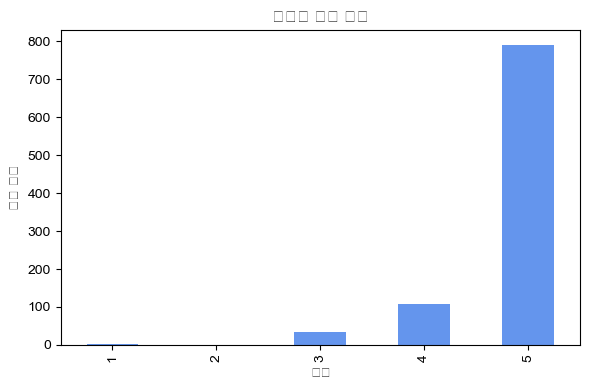

전체 평균 평점: 4.80


C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:30: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:30: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:30: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:30: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:30: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:30: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\user\m

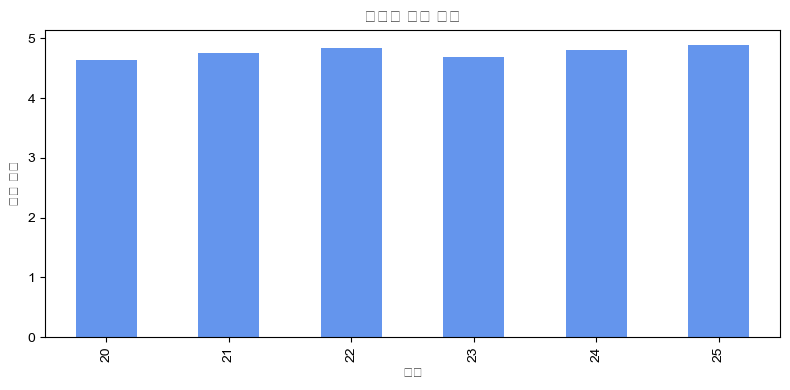

C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:40: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:40: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:40: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:40: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13912\332863.py:40: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\user\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  fig.canvas.print_f

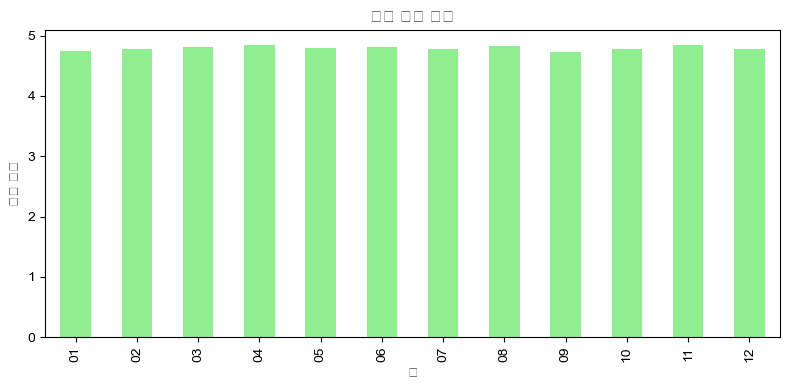

In [4]:
# review_crawling_raw.xlsx 파일에서 평점 관련 데이터 분석 및 시각화

# 1. 파일에서 데이터 추출
df_raw = pd.read_excel('review_crawling_raw.xlsx')

# 2. 평점 분포 시각화
plt.figure(figsize=(6,4))
df_raw['rating'].value_counts().sort_index().plot(kind='bar', color='cornflowerblue')
plt.title('평점별 리뷰 개수')
plt.xlabel('평점')
plt.ylabel('리뷰 개수')
plt.tight_layout()
plt.show()

# 3. 전체 평균 평점
mean_rating = df_raw['rating'].mean()
print(f"전체 평균 평점: {mean_rating:.2f}")

# 4. 연도/월 정보 추출 (예시: 'date' 컬럼이 YY.MM.DD. 형식일 경우)
df_raw['year'] = df_raw['date'].str.slice(0, 2)
df_raw['month'] = df_raw['date'].str.slice(3, 5)

# 5. 연도별 평균 평점
yearly_mean_rating = df_raw.groupby('year')['rating'].mean()
plt.figure(figsize=(8,4))
yearly_mean_rating.plot(kind='bar', color='cornflowerblue')
plt.title('연도별 평균 평점')
plt.xlabel('연도')
plt.ylabel('평균 평점')
plt.tight_layout()
plt.show()

# 6. 월별 평균 평점
monthly_mean_rating = df_raw.groupby('month')['rating'].mean()
plt.figure(figsize=(8,4))
monthly_mean_rating.plot(kind='bar', color='lightgreen')
plt.title('월별 평균 평점')
plt.xlabel('월')
plt.ylabel('평균 평점')
plt.tight_layout()
plt.show()

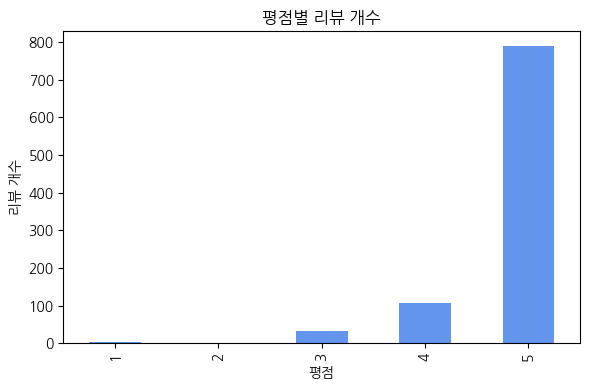

전체 평균 평점: 4.80


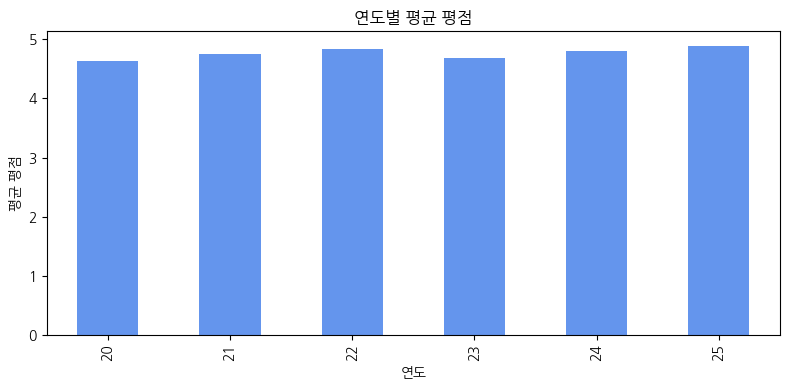

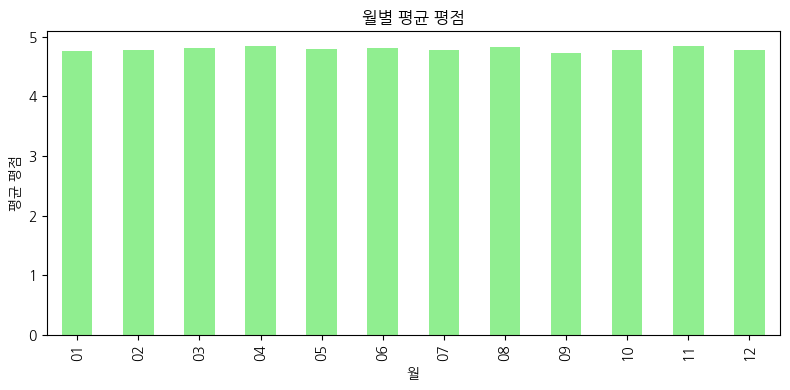

In [6]:
import pandas as pd

# review_crawling_raw.xlsx 파일에서 평점 관련 데이터 추출 및 시각화

import matplotlib.pyplot as plt

# 데이터 읽기
df_raw = pd.read_excel('review_crawling_raw.xlsx')

# 한글 폰트 설정 (이미 font_name, font_path 변수 있음)
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 평점 분포 시각화
plt.figure(figsize=(6,4))
df_raw['rating'].value_counts().sort_index().plot(kind='bar', color='cornflowerblue')
plt.title('평점별 리뷰 개수')
plt.xlabel('평점')
plt.ylabel('리뷰 개수')
plt.tight_layout()
plt.show()

# 전체 평균 평점
mean_rating = df_raw['rating'].mean()
print(f"전체 평균 평점: {mean_rating:.2f}")

# 연도/월 정보 추출 (예시: 'date' 컬럼이 YY.MM.DD. 형식일 경우)
df_raw['year'] = df_raw['date'].str.slice(0, 2)
df_raw['month'] = df_raw['date'].str.slice(3, 5)

# 연도별 평균 평점
yearly_mean_rating = df_raw.groupby('year')['rating'].mean()
plt.figure(figsize=(8,4))
yearly_mean_rating.plot(kind='bar', color='cornflowerblue')
plt.title('연도별 평균 평점')
plt.xlabel('연도')
plt.ylabel('평균 평점')
plt.tight_layout()
plt.show()

# 월별 평균 평점
monthly_mean_rating = df_raw.groupby('month')['rating'].mean()
plt.figure(figsize=(8,4))
monthly_mean_rating.plot(kind='bar', color='lightgreen')
plt.title('월별 평균 평점')
plt.xlabel('월')
plt.ylabel('평균 평점')
plt.tight_layout()
plt.show()